## Morphological Operators

In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [96]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCD',org=(100,350),fontFace = font, fontScale=5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [97]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray',vmin=0,vmax=1)

## Erosion

 ### 1 Iteration

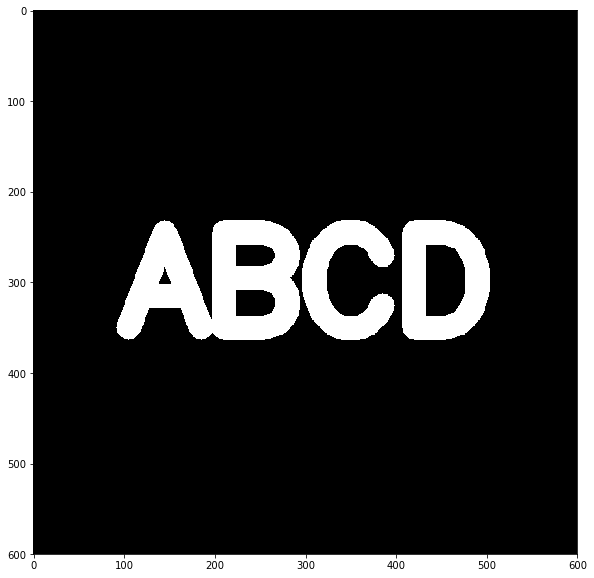

In [98]:
img = load_img()
display_img(img)

In [99]:
kernel = np.ones((5,5),dtype=np.uint8)

In [100]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [101]:
result = cv2.erode(img,kernel,iterations=1) #iterations = 1 will iterate only 1 time

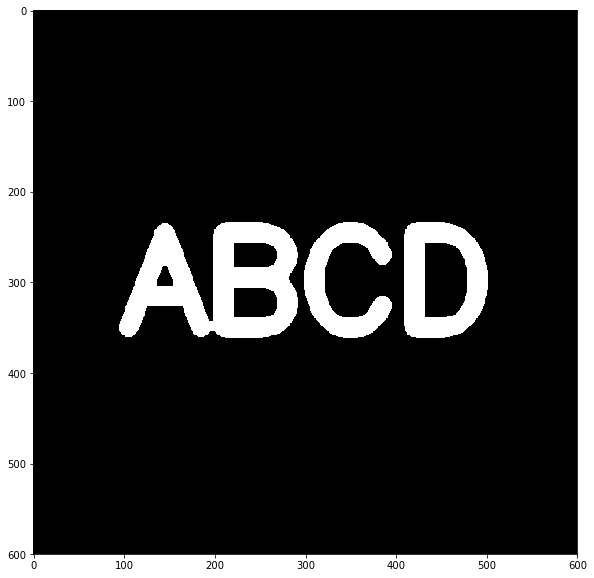

In [102]:
display_img(result)

### 5 Iterations

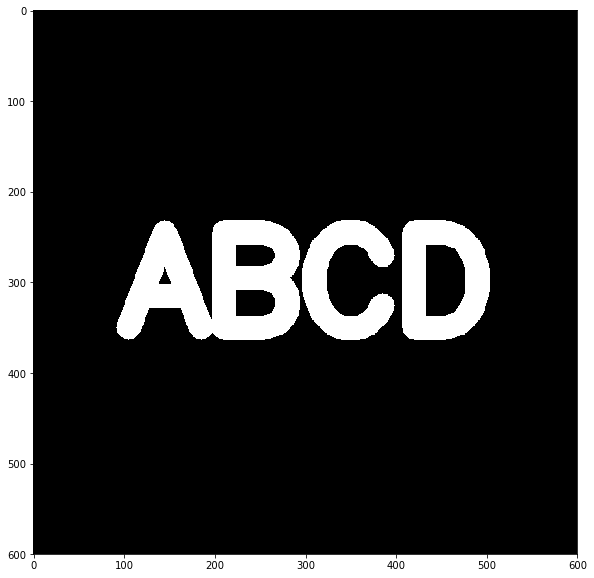

In [103]:
img = load_img()
display_img(img)

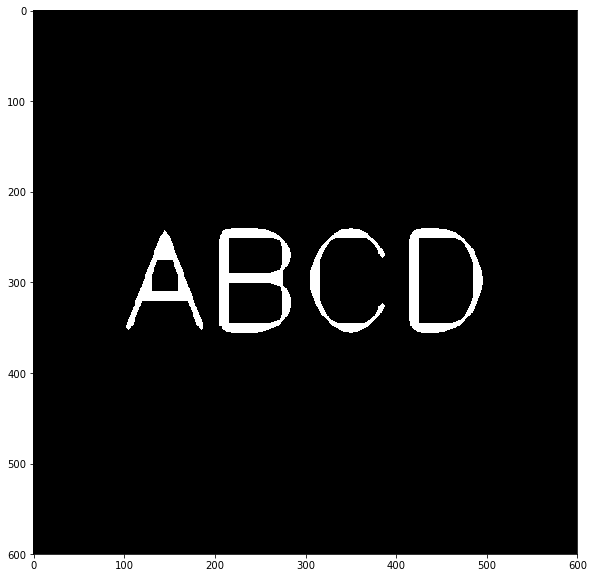

In [104]:
result = cv2.erode(img,kernel,iterations=4)
display_img(result)

## Dilation

We can either use erosion followed by dilation to get higher quality image or we can simply apply opening

In [105]:
img = load_img()

In [133]:
result = cv2.dilate(img,kernel,iterations = 5)

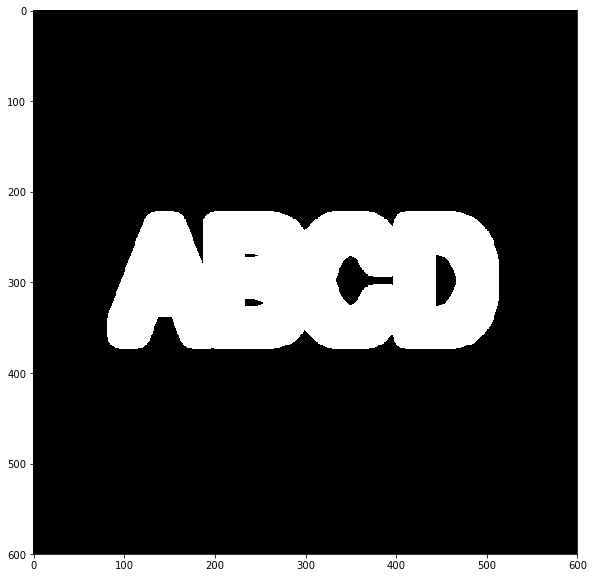

In [134]:
display_img(result)

In [106]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [107]:
white_noise

array([[1, 1, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 0]])

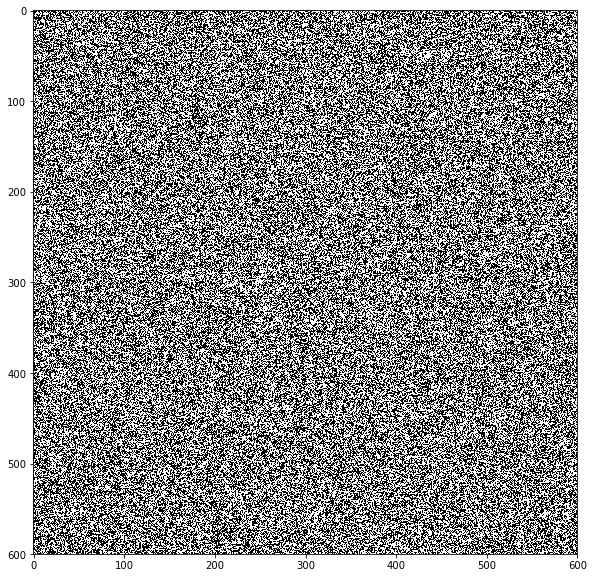

In [108]:
display_img(white_noise)

In [109]:
img.max()

255.0

In [110]:
img.shape

(600, 600)

In [111]:
white_noise = white_noise * 255

In [112]:
white_noise

array([[255, 255, 255, ..., 255,   0, 255],
       [255,   0,   0, ..., 255,   0, 255],
       [  0,   0,   0, ..., 255, 255,   0],
       ...,
       [255, 255, 255, ...,   0, 255,   0],
       [255,   0, 255, ..., 255,   0, 255],
       [255, 255,   0, ..., 255,   0,   0]])

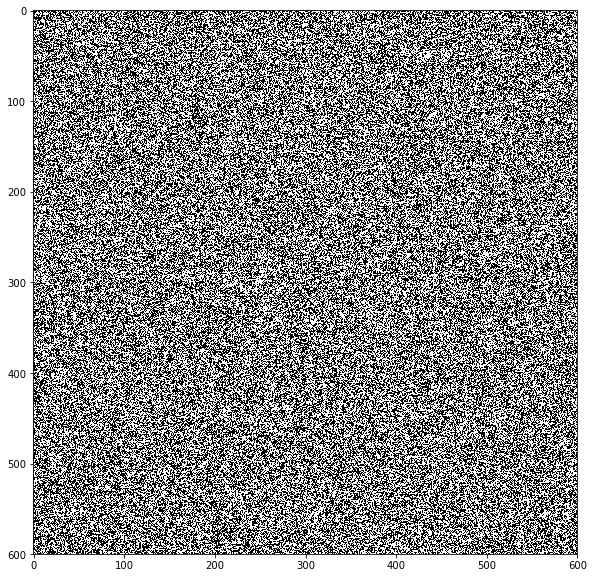

In [113]:
display_img(white_noise)

In [114]:
noise_img = white_noise + img

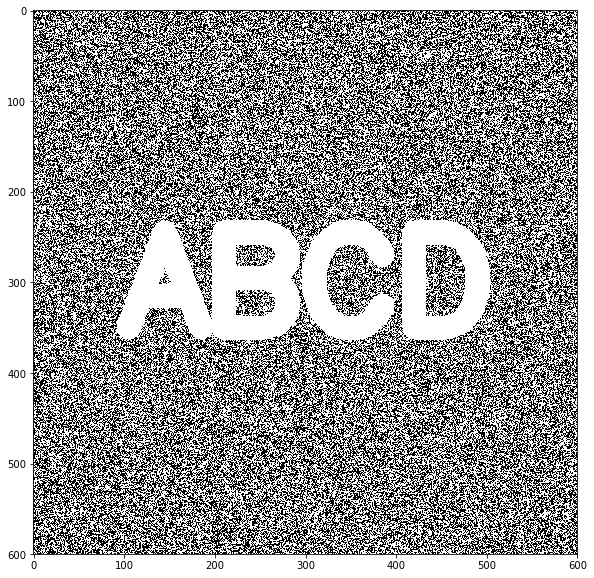

In [115]:
display_img(noise_img)

## Opening Operator

In [118]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

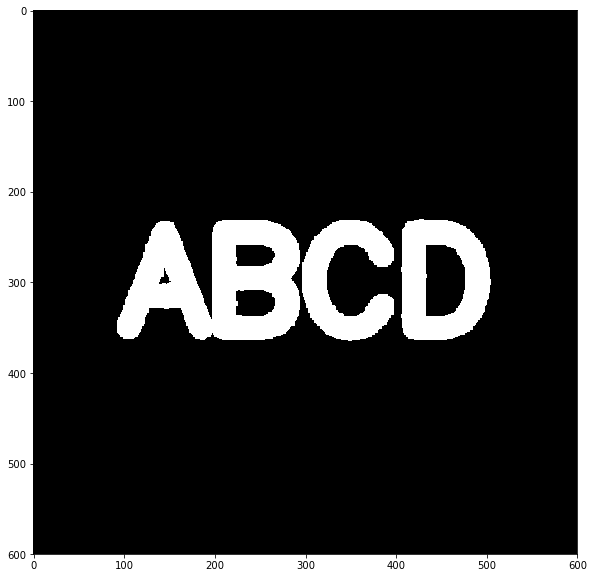

In [119]:
display_img(opening)

## Closing Operator

In [120]:
img = load_img()

In [121]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [123]:
black_noise = black_noise*-255

In [124]:
black_noise

array([[   0,    0,    0, ...,    0, -255, -255],
       [   0,    0,    0, ..., -255,    0,    0],
       [-255, -255, -255, ...,    0,    0,    0],
       ...,
       [-255, -255, -255, ..., -255, -255,    0],
       [-255, -255,    0, ..., -255, -255,    0],
       [   0, -255,    0, ..., -255, -255,    0]])

In [125]:
black_noise_img = img + black_noise

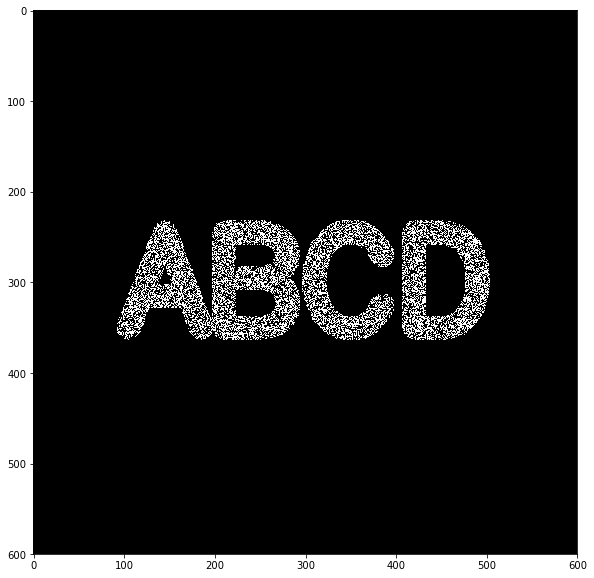

In [126]:
display_img(black_noise_img)

In [127]:
black_noise_img[black_noise_img==-255] = 0

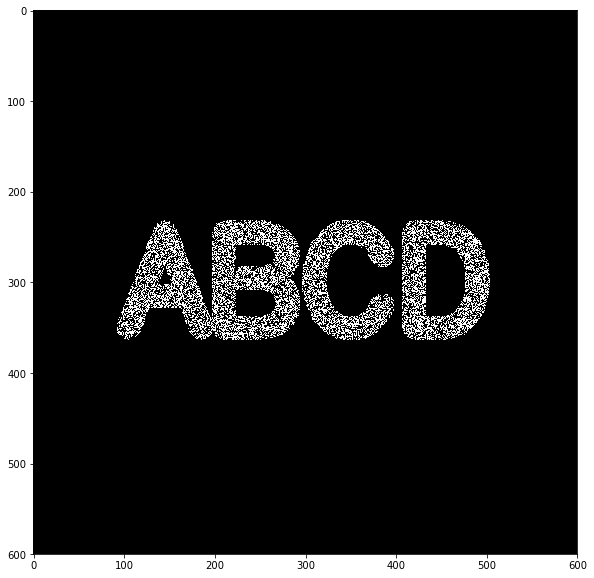

In [128]:
display_img(black_noise_img)

In [129]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel) # kernel size can be changed to see different results

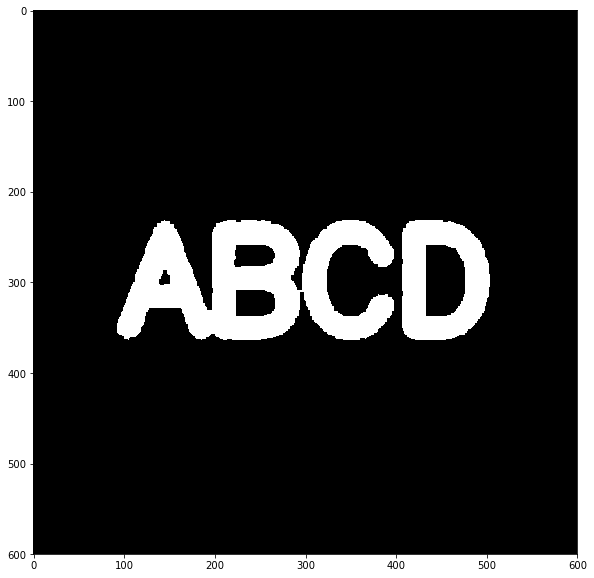

In [130]:
display_img(closing)

## Morphological Gradient

Morphological gradient will take difference between erosion and dilation

We can think that morphological gradient is a simple edge detection algorithm

In [131]:
img = load_img()

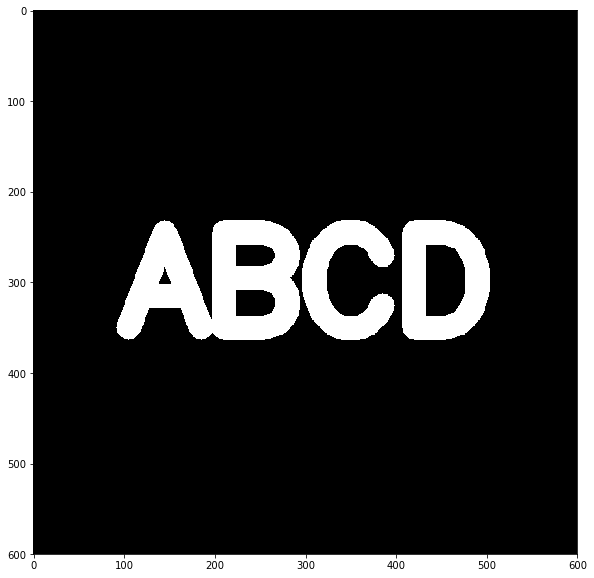

In [132]:
display_img(img)

In [139]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

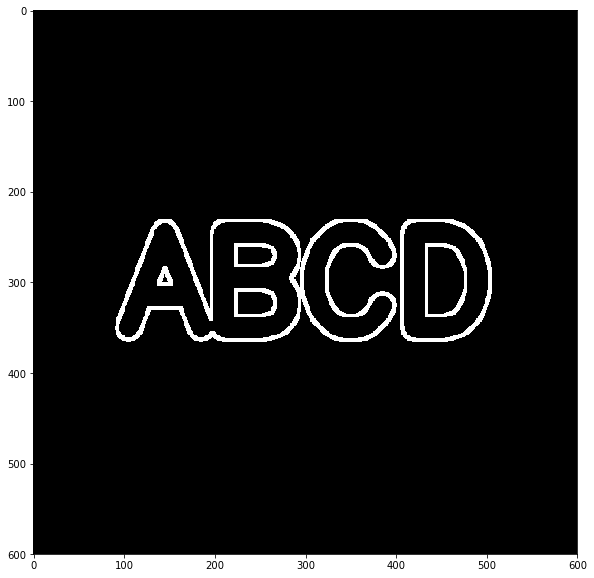

In [140]:
display_img(gradient)